<h1 align="center">El átomo de hidrógeno</h1>
<div align="right">David A. Miranda, PhD<br>2023</div>

## 1. Cargar librerías

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
from scipy.special import genlaguerre, sph_harm
from scipy import constants as ct
try:
    from anytree import Node, RenderTree
except:
    !pip install anytree
    from anytree import Node, RenderTree


## 2. Planteamiento del problema

Sea un electrón descrito por la función de onda $\psi_{nlm}(\vec{r})$, sin considerar el espín, confinado en un potencial coulombiano $U(r) = -\frac{q_e^2}{4\pi\epsilon_0 r}$, donde $q_e$ es la carga elemental y $\epsilon_0$, la permitividad eléctrica del vacío. Además, sea $\mu=\frac{m_e m_p}{m_e + m_p}$ la masa reducida del sistema de dos cuerpos formado por un electrón y un protón, entonces, el hamiltoniano $\hat{H}$ que describe la interacción entre el electrón y el protón que lo confina (por el potencial coulombiano), está dado por,

$$\hat{H} = -\frac{\hbar^2}{2\mu}\nabla^2 - \frac{q_e^2}{4\pi\epsilon_0 r}$$

Las funciones propias del hamiltoniano $\psi_{nlm}(\vec{r})$ corresponderán con los estados propios asociados a la energía total del sistema, tales que $\hat{H}\psi_{nlm}(\vec{r}) = E_n \psi_{nlm}(\vec{r})$. Como el potencial coulombiano es central, entonces, el operador Laplaciano $\nabla^2$ se puede representar en coordenadas esféricas, por lo tanto,

$$-\frac{\hbar^2}{2\mu r^2} \left[ \frac{\partial}{\partial r} \left( r^2 \frac{\partial}{\partial r} \right) + \frac{1}{sen\theta} \frac{\partial}{\partial \theta} \left( sen\theta \frac{\partial }{\partial \theta} \right) + \frac{1}{sen^2\theta} \frac{\partial^2}{\partial \varphi^2}   \right] \psi_{nlm}(\vec{r}) = E_n \psi_{nlm}(\vec{r})$$

Como $\hat{L}^2 = -\hbar^2 \left[ \frac{1}{sen\theta} \frac{\partial}{\partial \theta} \left( sen\theta \frac{\partial }{\partial \theta} \right) + \frac{1}{sen^2\theta} \frac{\partial^2}{\partial \varphi^2} \right]$, entonces, la ecuación diferencial que describe al átomo de hidrógeno se puede separar en dos, una para la parte radial $R_{nl}(r)$ y la otra, para las componentes angular y azimutal, $Y_m^l(\theta, \varphi)$ (armónicos esféricos), tales que $\psi_{nlm}(\vec{r}) = R_{nl}(r) Y_l^m(\theta, \varphi)$,

$$ -\frac{\alpha^2}{2} \mu c^2 \left[ \frac{a_0^2}{r^2} \frac{d}{d r} \left( r^2 \frac{d}{d r} \right) - \frac{a_0^2}{r^2} l(l+1) + \frac{2 a_0}{r} \right] R_{nl}(r) = E_n R_{nl}(r)$$

$$ \hat{L}^2 Y_l^m(\theta, \varphi) = \hbar^2 l(l+1) Y_l^m(\theta, \varphi) $$

$$R_{nl}(r)=\left[ \left( 2k_n \right)^3 \frac{(n-l-1)!}{2n(n+l)!} \right]^{1/2} (2 k_n r)^l e^{-k_n r} L_{n-l-1}^{2l+1}(2k_n r)$$

$$E_n = -\frac{\alpha^2}{2 n^2}\mu c^2 = - \frac{\hbar^2 k_n^2}{2 \mu}$$

Donde $k_n = \frac{1}{na_0}$, $a_0 = \frac{1}{\alpha}\frac{\hbar}{\mu c}$ (radio de Bohr), $\alpha= \frac{q_e^2}{4\pi\epsilon_0\hbar c}$ (constante de estructura fina)  y $L_{n+l}^{2l+1}(2k_n r)$ son polinomios asociados de Laguerre

+ Obtenga las condiciones que deben cumplir los números cuánticos $n$, $l$ y $m$.
+ Grafique los diferentes niveles de energía $E_n$.
+ Grafique las funciones de onda para ciertos valores de los números cuánticos $n$, $l$ y $m$.

## 3. Métodos y definiciones

In [2]:
α = ct.alpha
a0 = ct.physical_constants['Bohr radius'][0]
µ = ct.m_e * ct.m_p / (ct.m_e + ct.m_p)
e = ct.elementary_charge
c = ct.speed_of_light
dpi = 300
fig = 0

In [3]:
def show_lm(n=1):
    nodes = []
    n0 = Node(f'n={n}')
    for l in np.arange(0, n+1):
        l0 = Node(f'l={l}', parent=n0)
        for m in np.arange(-l, l+1):
            Node(f'm={m}', parent=l0)

    for pre, fill, node in RenderTree(n0):
        print("%s%s" % (pre, node.name))

In [4]:
def energy(n):
    E = -α**2 * µ * c**2 / (2 * n**2)
    return E / e

In [5]:
def plot_energy(n=4, dpi=300, Δm=0.1, fig=1):
    plt.figure(dpi=dpi)
    yticks = []
    for nn in range(1, n+1):
        E = energy(nn)
        yticks.append(E)
        for m in np.arange(-nn+1, nn):
            plt.plot([m-Δm, m+Δm], [E, E], 'k')
        plt.text(nn+2*Δm, E, f'n={nn}', style='italic', fontname='Times New Roman')
    plt.xlim(-n-1.5, n+1.5)
    plt.xticks(np.arange(-n, n+1))
    plt.yticks(yticks)
    plt.xlabel(r'$m$')
    plt.ylabel(r'$E_n$  $[eV]$')
    plt.title(f'Figura {fig}')

In [6]:
def factorial(n):
    if n < 0:
        raise ValueError("El factorial no está definido para números negativos.")
    elif n == 0:
        return 1
    else:
        return np.prod(np.arange(1, n + 1))

In [7]:
def wavefunction(r, θ, φ,n=2, l=1, m=-1):
    kn = 1/(a0 * n)
    nl1_fact = factorial(n -  l - 1)
    nn1_fact = 2 * n * factorial(n + l)
    cte_norm = np.sqrt( (2*kn)**3  * nl1_fact / nn1_fact)
    asynt = (2*kn*r)**l * np.exp(-kn * r)
    L = genlaguerre(n-l-1, 2*l + 1)(kn * r)
    Y = sph_harm(m, l, φ,  θ)
    return cte_norm * asynt * L * Y

In [8]:
def plot_rev(n=5, l=1, m=0, φ=np.pi/4, r=a0, square=False, ax=None, fig=1):
    θ = np.linspace(0, np.pi, 100)
    wavefunction_values = wavefunction(r, θ, φ, n=n, l=l, m=m)
    Y = np.abs(wavefunction_values)
    if square:
        Y = Y**2

    z = Y * np.cos(θ)
    x = Y * np.sin(θ)

    z = np.append(z[::-1], z)
    x = np.append(-x, x)

    if ax is None:
        ax = plt.gca()
    ax.plot(x, z)
    ax.axis('equal')
    ax.vlines(0, min(z), max(z), color='r')
    exp = f'^{2}' if square else ''
    ax.set_xlabel(fr'$|\psi_{{nlm}}(\vec{{r}})|{exp}\,sen(\theta)$')
    ax.set_ylabel(fr'$|\psi_{{nlm}}(\vec{{r}})|{exp}\,cos(\theta)$')
    ax.set_title(f'Figura {fig}. n={n}, l={l}, m={m}', style='italic', fontname='Times New Roman')
    ax.set_xticks([])
    ax.set_yticks([])

In [9]:
def plot_radial(n=1, l=0, m=0, θ=0, rmax=10*a0, φ=np.pi/4, square=False, ax=None, fig=1):
    r = np.linspace(0, rmax, 1000)
    wavefunction_values = wavefunction(r, θ, φ, n=n, l=l, m=m)
    Y = np.abs(wavefunction_values)
    if square:
        Y = Y**2
    if ax is None:
        ax = plt.gca()
    ax.plot(1e9 * r, Y, label=f'n={n}, l={l}')
    return r, Y


In [10]:
def plot_radials(nmin=1, nmax=2, θ=0, rmax=10*a0, φ=np.pi/4, square=False, ax=None, fig=1):
    r = []
    Y = []
    if ax is None:
        ax = plt.gca()
    Ymin = np.inf
    Ymax = 0
    for n in np.arange(nmin, nmax+1):
        for l in np.arange(0, n):
            r, Y = plot_radial(n=n, l=l, m=0, θ=θ, rmax=rmax, φ=φ, square=square, ax=ax, fig=fig)
            if min(Y) < Ymin:
                Ymin = min(Y)
            if max(Y) > Ymax:
                Ymax = max(Y)
    for x in np.arange(a0, rmax, a0):
        ax.vlines(1e9 * x, Ymin, 1.1*Ymax, color='k', linestyles='dashed', alpha=0.4)
    ax.set_xlim(0, 1e9*rmax)
    ax.set_ylim(Ymin, 1.1*Ymax)
    exp = f'^{2}' if square else ''
    ax.set_xlabel(r'$r$ $[nm]$')
    ax.set_ylabel(fr'$|\psi_{{nlm}}(\vec{{r}})|{exp}$')
    ax.set_title(f'Figura {fig}')
    ax.set_xticks(1e9*np.arange(a0, rmax, a0))
    ax.set_yticks([])
    font_props = FontProperties(style='italic', family='Times New Roman')
    plt.legend(prop=font_props)

## 4. Cálculos y gráficos

### 4.1. Números cuánticos $n$, $l$ y $m$

Nótese que $R_{nl}(r)$ es una función finita, por lo tanto, $n+l \geq 0$ y $n-l-1 \geq 0$, esto implica que $n \geq 1$, además, $l < n$. En cuanto al número cuántico $m$, dado que los armónicos esféricos $Y_l^m(\theta, \varphi)$ requieren que $|m| \leq l$, entonces, se obtiene la condición para el número cuántico $m$. En resumen,

$$n = 1, 2, ...$$
$$l < n$$
$$|m| \leq l$$

In [11]:
show_lm(n=1)

n=1
├── l=0
│   └── m=0
└── l=1
    ├── m=-1
    ├── m=0
    └── m=1


In [12]:
show_lm(n=2)

n=2
├── l=0
│   └── m=0
├── l=1
│   ├── m=-1
│   ├── m=0
│   └── m=1
└── l=2
    ├── m=-2
    ├── m=-1
    ├── m=0
    ├── m=1
    └── m=2


In [13]:
show_lm(n=3)

n=3
├── l=0
│   └── m=0
├── l=1
│   ├── m=-1
│   ├── m=0
│   └── m=1
├── l=2
│   ├── m=-2
│   ├── m=-1
│   ├── m=0
│   ├── m=1
│   └── m=2
└── l=3
    ├── m=-3
    ├── m=-2
    ├── m=-1
    ├── m=0
    ├── m=1
    ├── m=2
    └── m=3


### 4.2. Niveles de energía $E_n$

$$E_n = -\frac{\alpha^2}{2 n^2}\mu c^2 = - \frac{\hbar^2 k_n^2}{2 \mu}$$

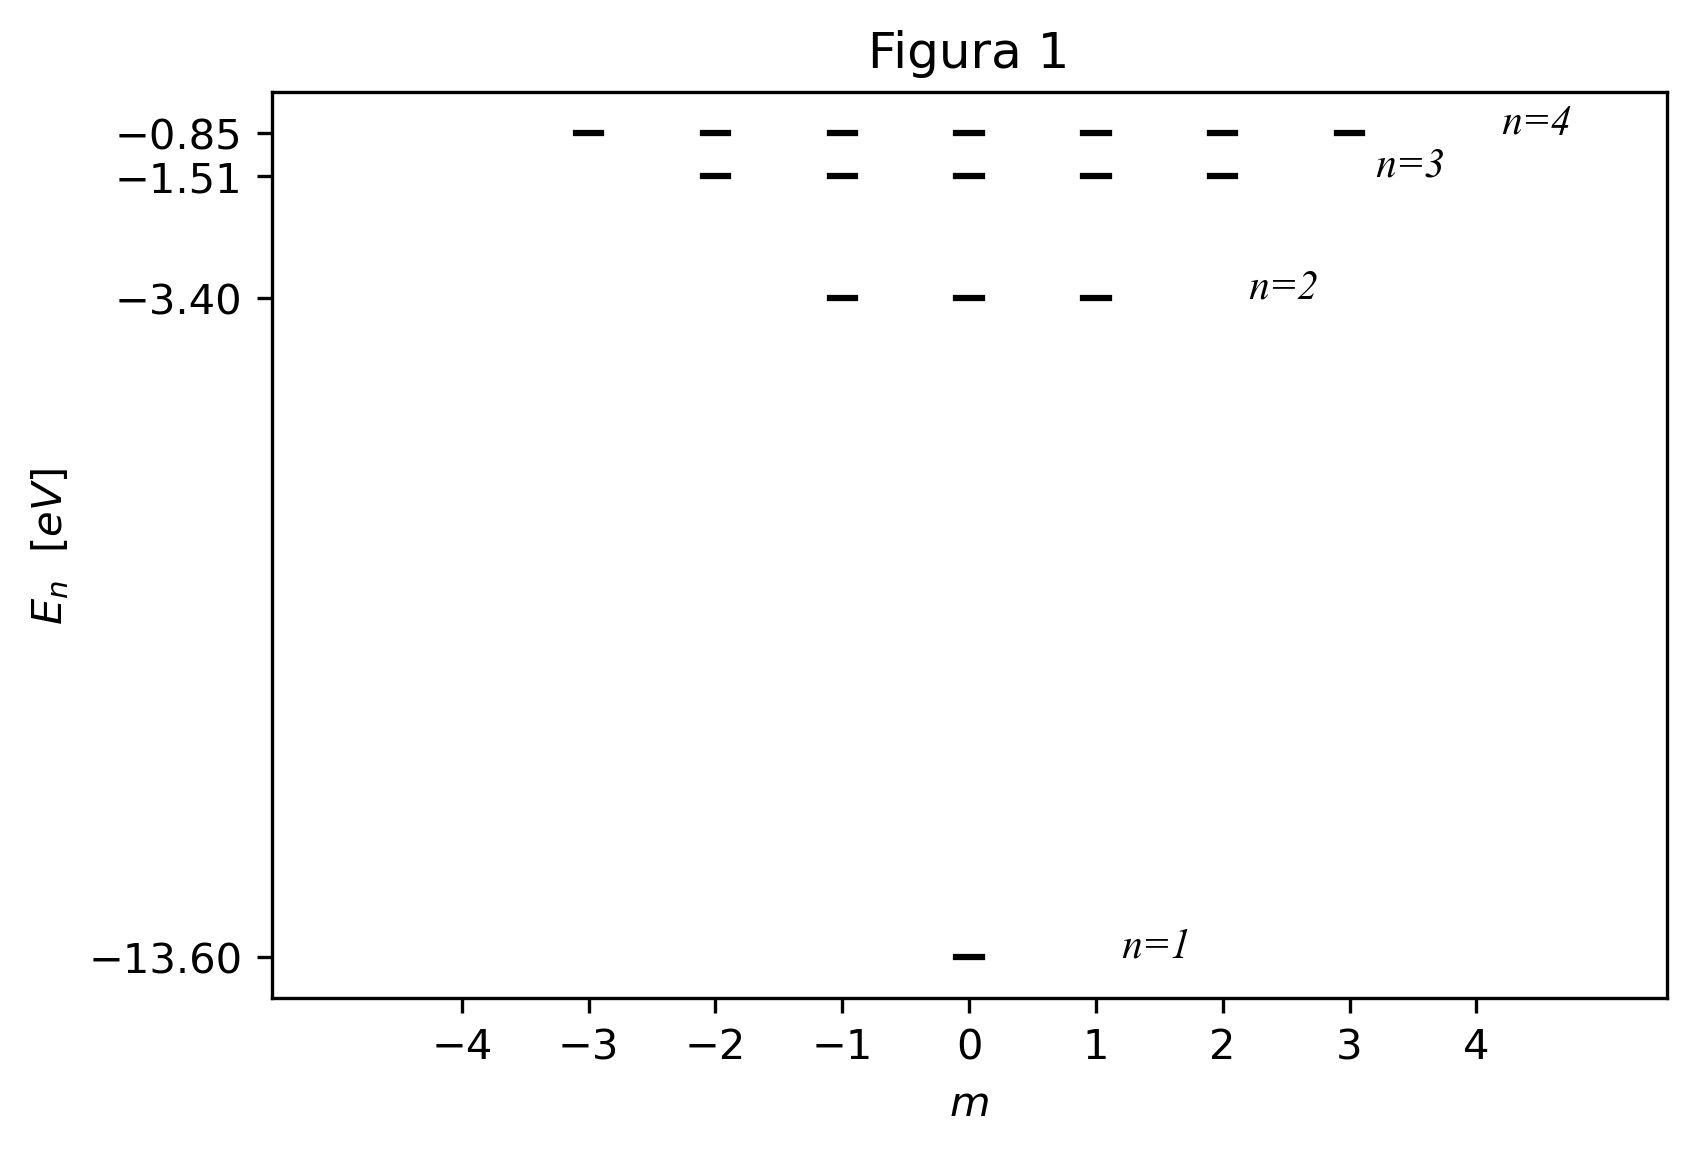

In [14]:
fig += 1
plot_energy(n=4, fig=fig)

### 4.3. Funciones de onda $\psi_{nlm}$

$$\psi_{nlm} = R_{nl}(r)Y_l^m(\theta, \varphi)=\left[ \left( 2k_n \right)^3 \frac{(n-l-1)!}{2n(n+l)!} \right]^{1/2} (2 k_n r)^l e^{-k_n r} L_{n-l-1}^{2l+1}(2k_n r)Y_l^m(\theta, \varphi)$$

In [15]:
n = 2
l = 1
m = -1
kn = 1e-9/(a0 * n) # 1/nm


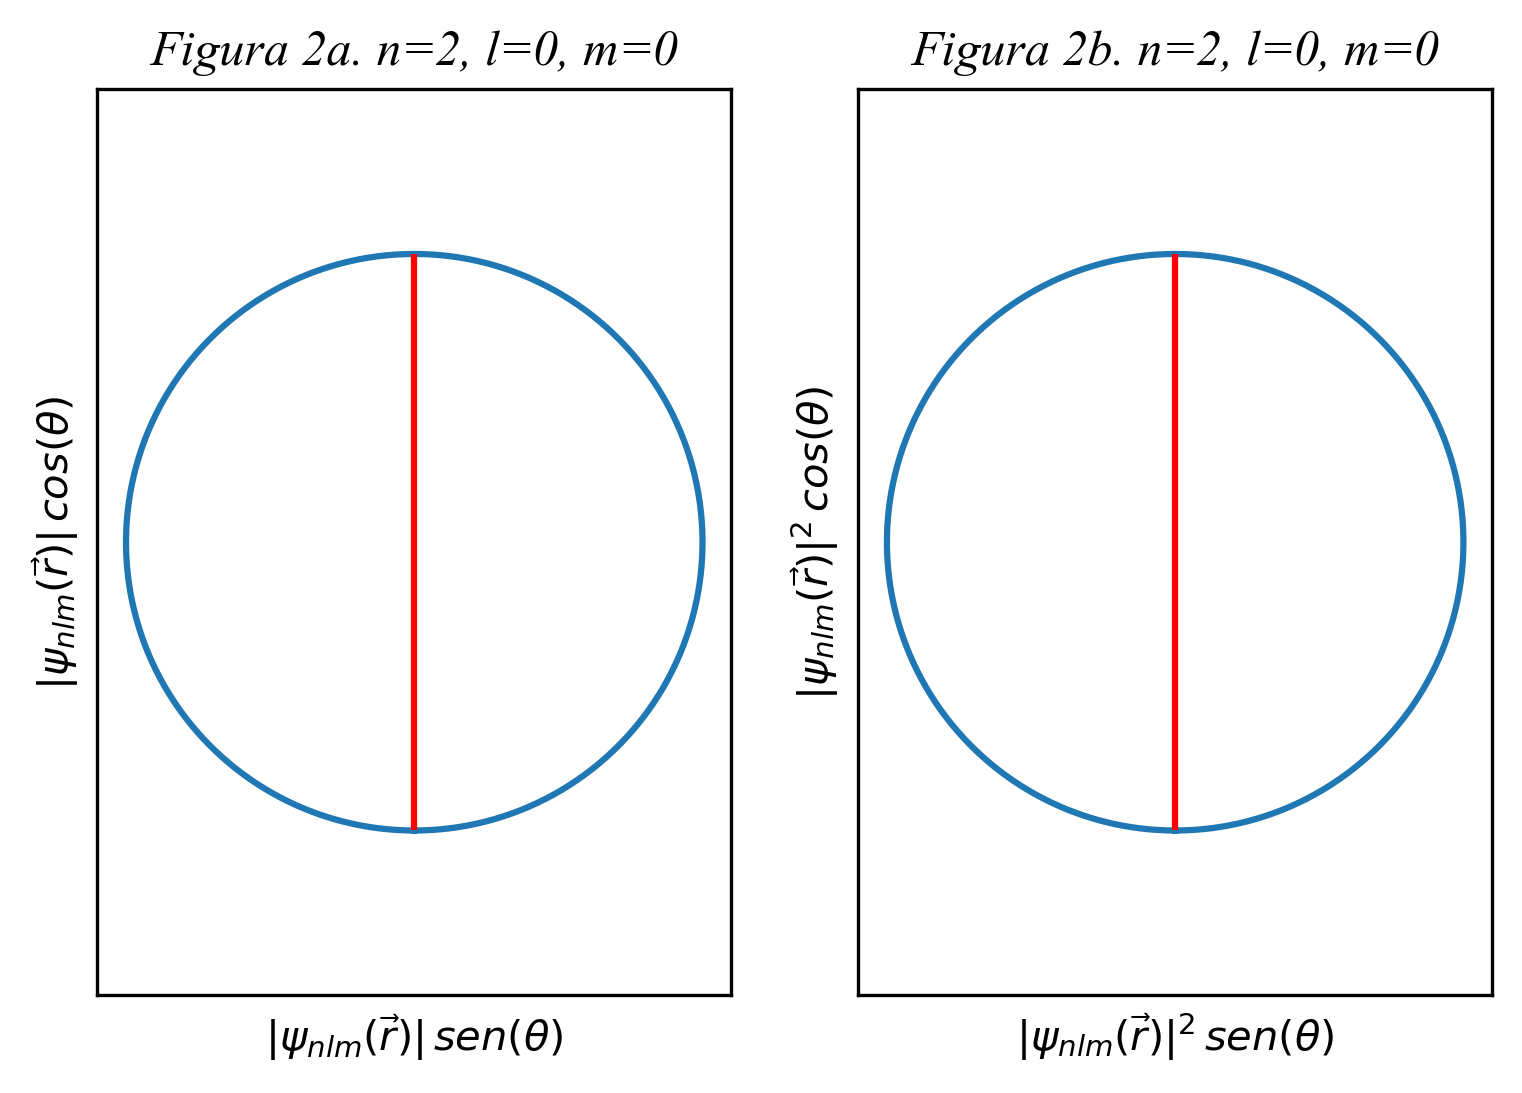

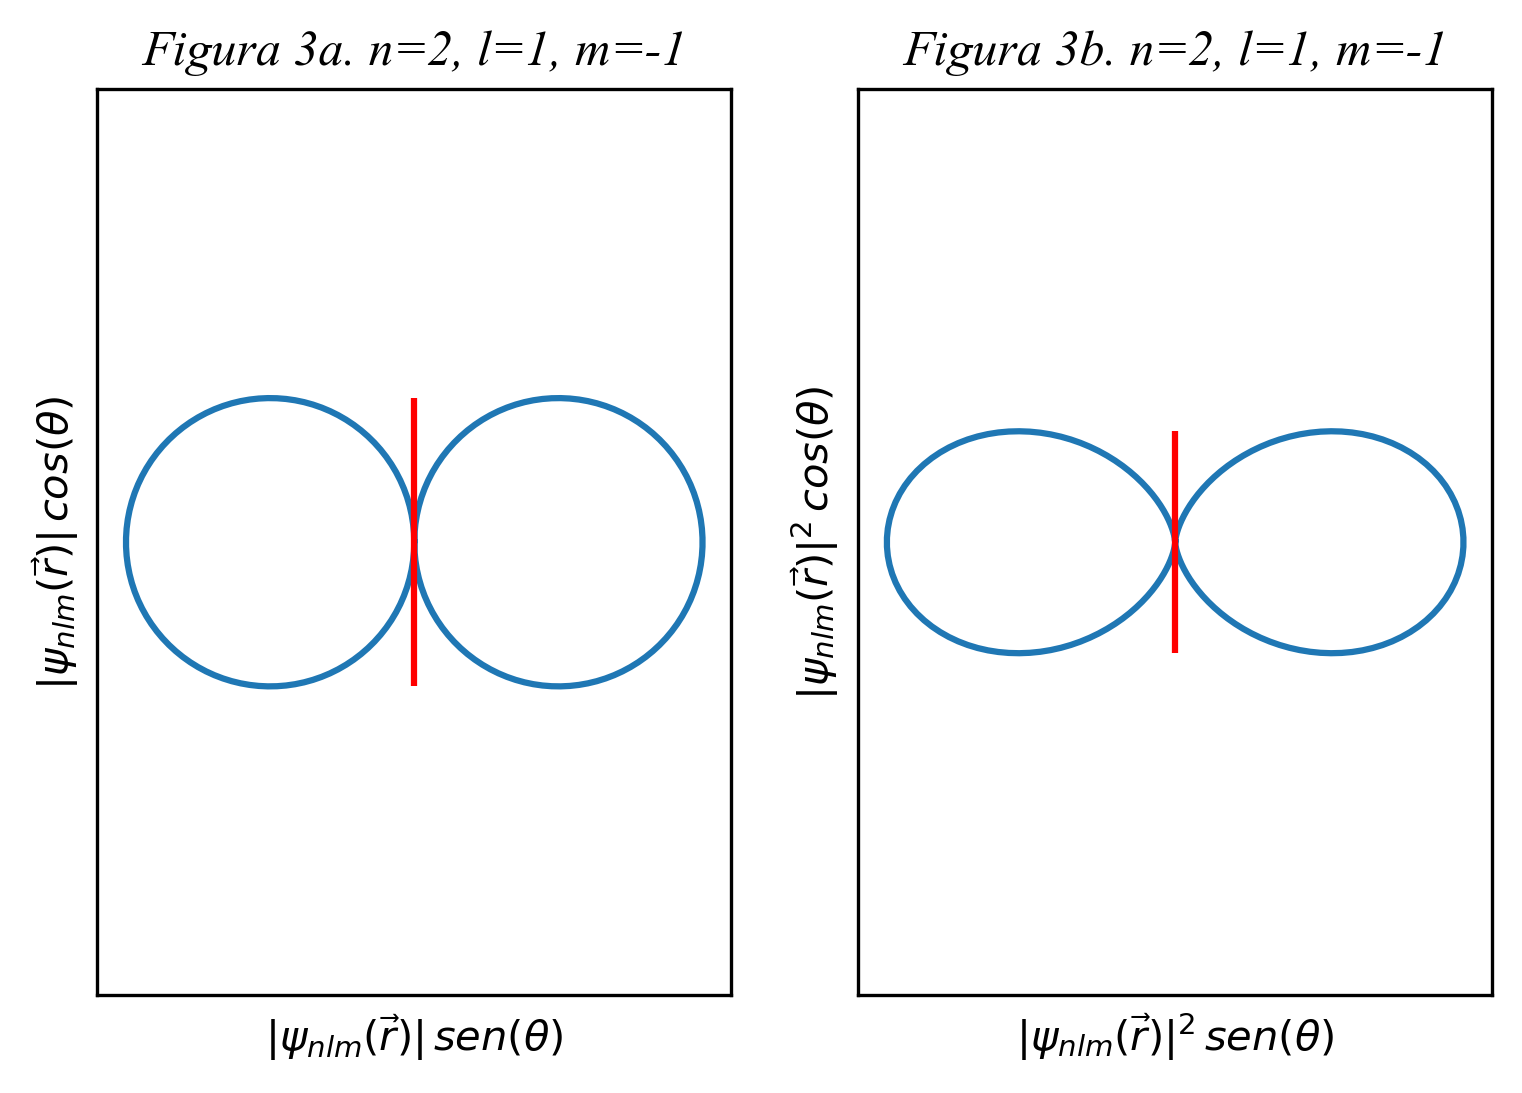

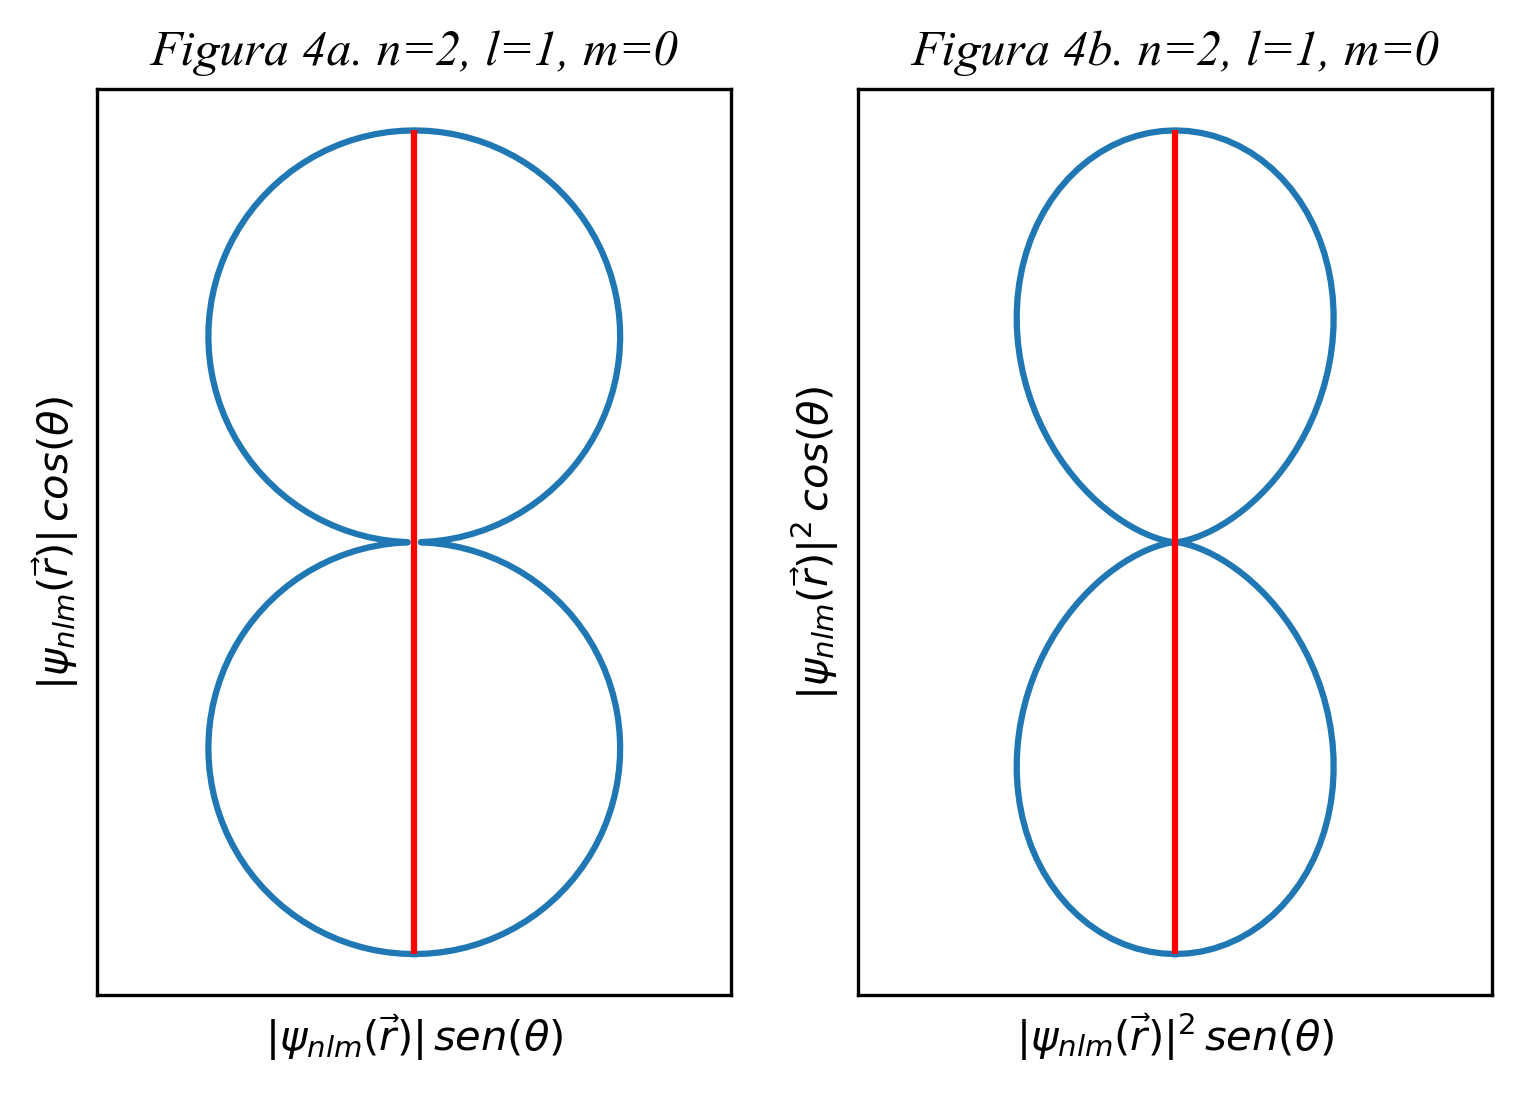

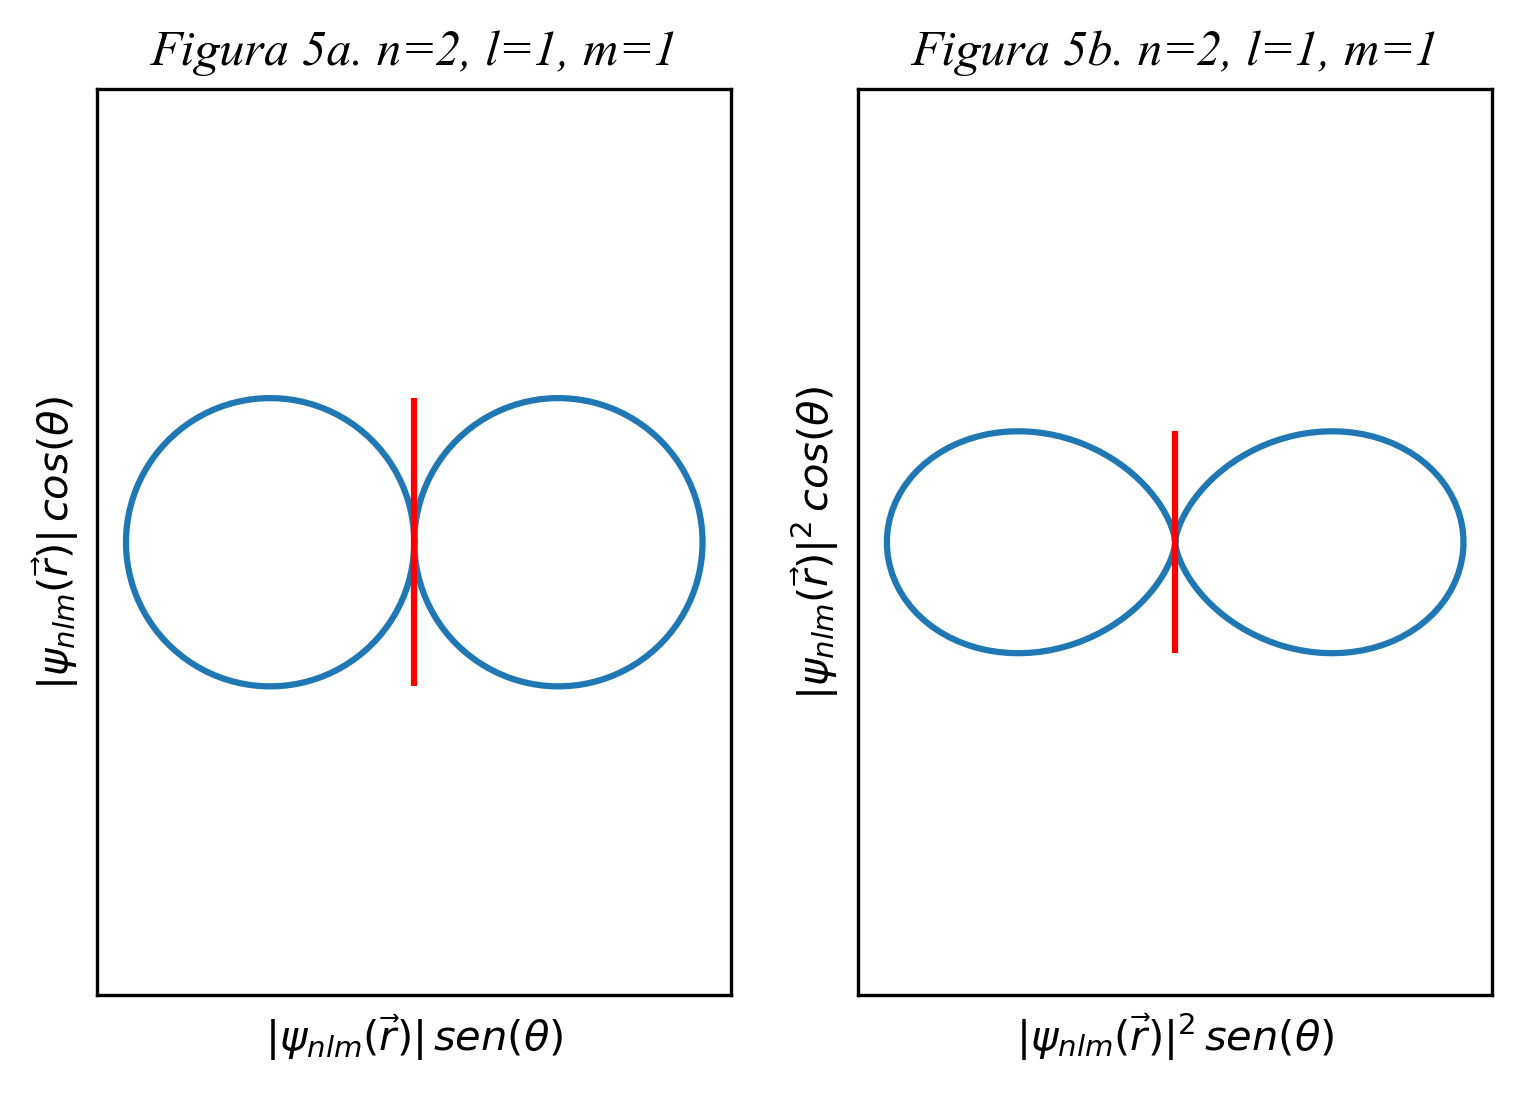

In [16]:
n = 2
for l in np.arange(0, n):
    for i, m in enumerate(np.arange(-l, l+1)):
        _, (ax1, ax2) = plt.subplots(1, 2, dpi=dpi)
        fig += 1
        plot_rev(n=n, l=l, m=m, φ = np.pi/4, r = a0, square=False, fig=f'{fig}a', ax=ax1)
        plot_rev(n=n, l=l, m=m, φ = np.pi/4, r = a0, square=True , fig=f'{fig}b', ax=ax2)

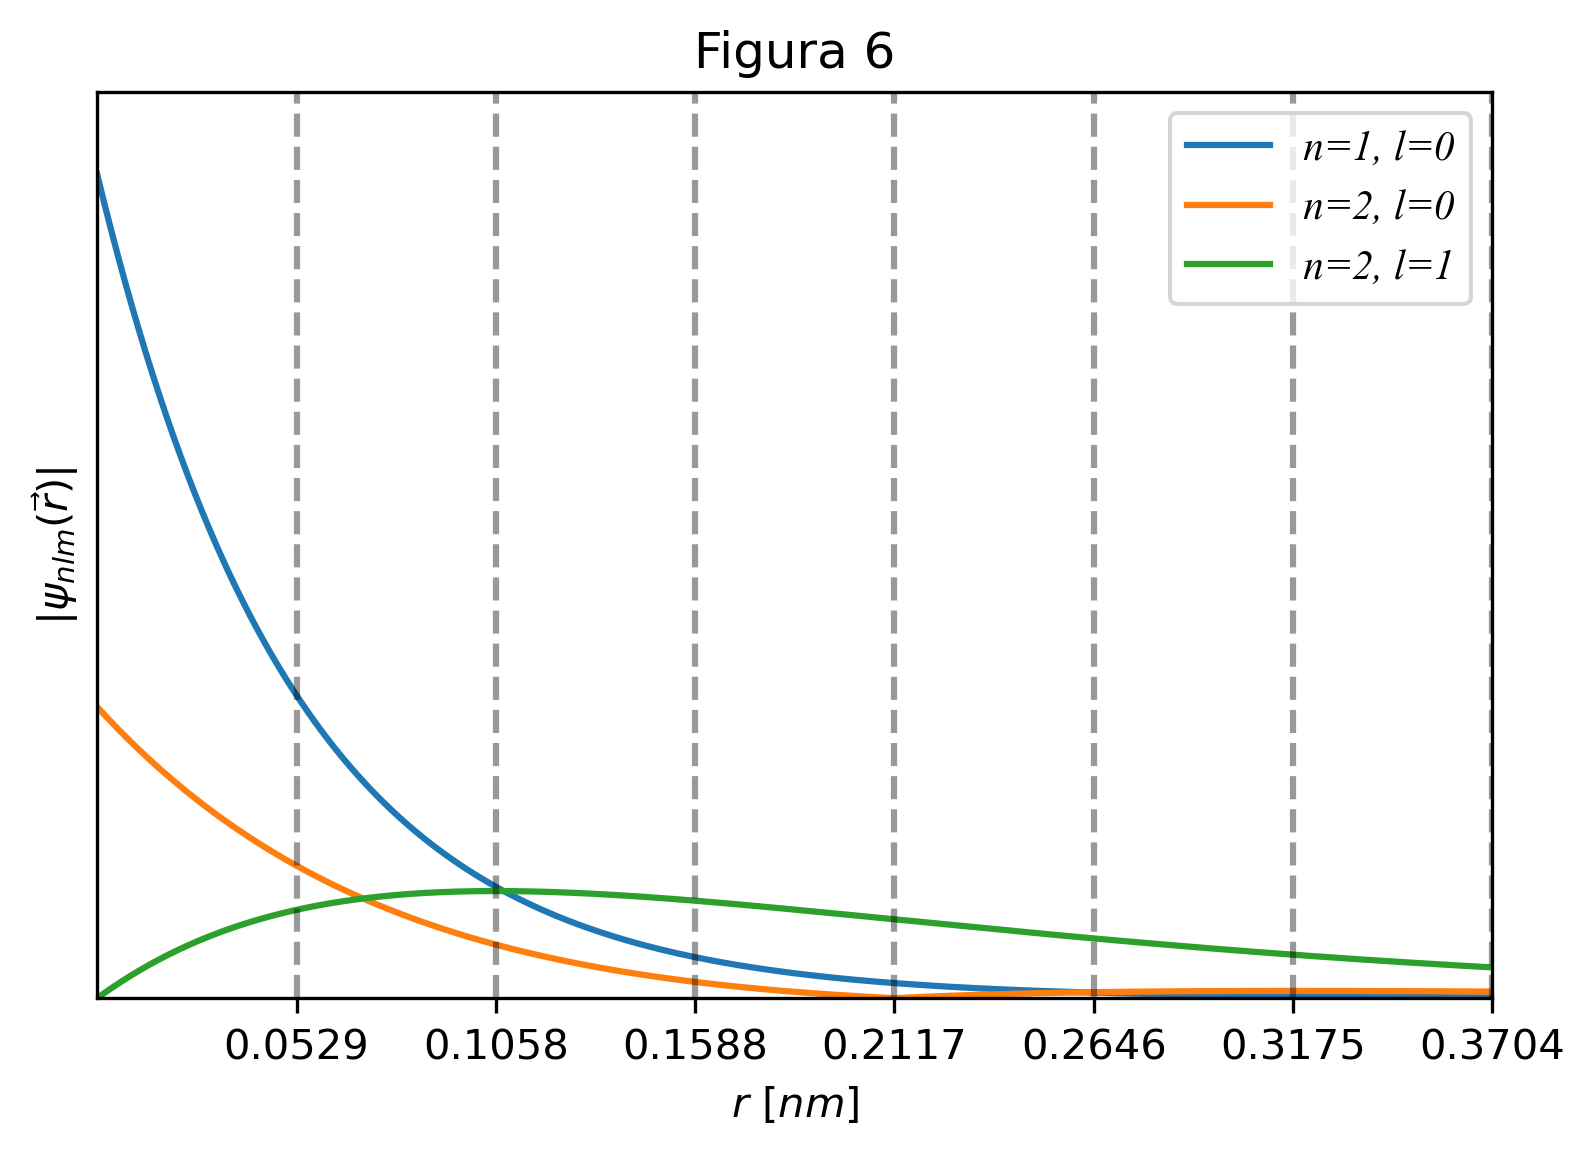

In [17]:
fig += 1
plt.figure(dpi=dpi)
plot_radials(nmin=1, nmax=2, rmax=7*a0, fig=fig)

## 5. Preguntas de autoexplicación

End!